In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Load training data
train_df = pd.read_csv("fashion-mnist_train.csv")
x_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values

In [3]:
# Load testing data
test_df = pd.read_csv("fashion-mnist_test.csv")
x_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values


In [4]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape to 28x28x1
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
# Class names (optional for display)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

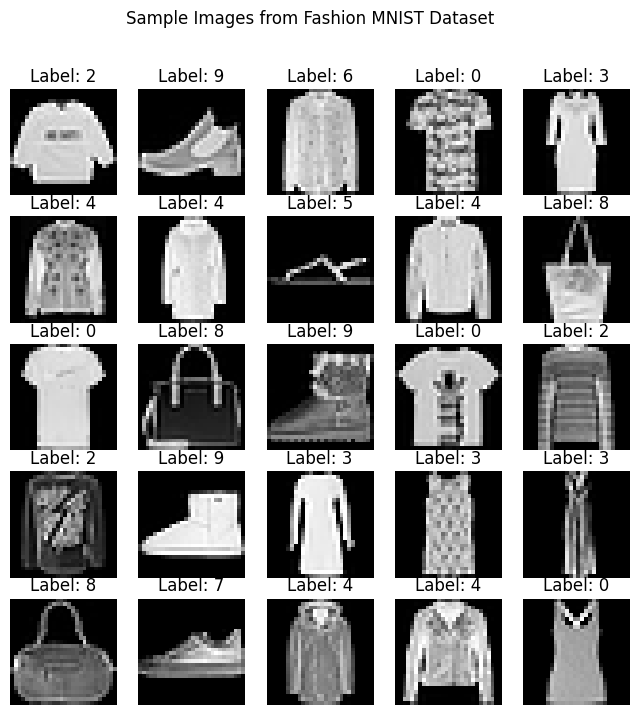

In [6]:
import matplotlib.pyplot as plt

# Show first 25 images with labels
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Images from Fashion MNIST Dataset")
plt.show()

In [9]:

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])



C:\Users\chaud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [11]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7502 - loss: 0.6889 - val_accuracy: 0.8700 - val_loss: 0.3703
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8784 - loss: 0.3364 - val_accuracy: 0.8689 - val_loss: 0.3473
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8991 - loss: 0.2766 - val_accuracy: 0.8986 - val_loss: 0.2911
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9103 - loss: 0.2488 - val_accuracy: 0.8975 - val_loss: 0.2829
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9208 - loss: 0.2157 - val_accuracy: 0.9072 - val_loss: 0.2630
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9250 - loss: 0.1989 - val_accuracy: 0.9098 - val_loss: 0.2635
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9333 - loss: 0.1767 - val_accuracy: 0.8993 - val_loss: 0.2777
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9411 - loss: 0.1593 - 

In [12]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9065 - loss: 0.2790

Test Accuracy: 91.20%


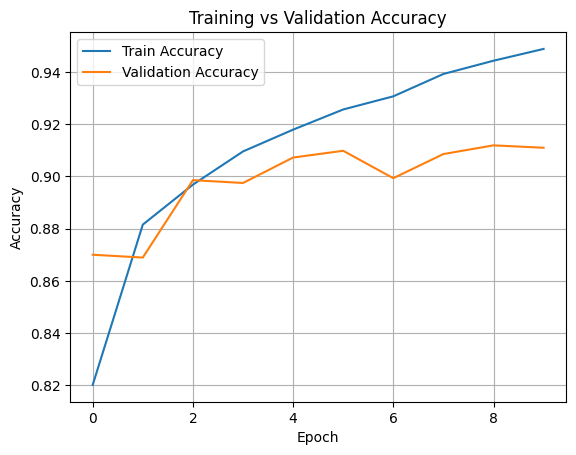

In [13]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
from PIL import Image
import numpy as np

# Load the image
img = Image.open("downlo.jpeg").convert("L")  # Convert to grayscale

# Resize to 28x28
img = img.resize((28, 28))

# Convert to numpy array
img_array = np.array(img)

# Normalize
img_array = img_array / 255.0

# Invert colors if needed (white background instead of black)
# img_array = 1 - img_array

# Reshape to match input shape (1, 28, 28, 1)
img_array = img_array.reshape(1, 28, 28, 1)

# Predict
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# Output class
print("Predicted label:", class_names[predicted_label])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted label: Shirt


In [33]:
from PIL import Image
import numpy as np

# Load and process image
img = Image.open("images.jpeg").convert("L")       # Convert to grayscale
img = img.resize((28, 28))                            # Resize
img_array = np.array(img) / 255.0                     # Normalize

# Invert if your image is black-on-white
img_array = 1 - img_array

# Reshape for model
img_array = img_array.reshape(1, 28, 28, 1)


In [34]:
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
print("Predicted:", class_names[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted: Sandal
